### Kaggle - GiveMeSomeCredit

Name: Guanlun Zhao

Email: guanlun.zhao@u.nus.edu

In [50]:
import numpy as np
import pandas as pd
import time
import os
import joblib
from matplotlib import pyplot

from sklearn import svm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier

### Preprocessing

In [2]:
# Preprocess Data
df = pd.read_csv("cs-training.csv", index_col=0)
df = df.loc[(df["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df["RevolvingUtilizationOfUnsecuredLines"] < 13)]
df = df.loc[df["DebtRatio"] <= df["DebtRatio"].quantile(0.97)]
df = df.loc[df["NumberOfTimes90DaysLate"] <= 17]

In [3]:
# Impute Training Data
dependents_mode = df["NumberOfDependents"].mode()[0] # impute with mode
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(dependents_mode)

income_median = df["MonthlyIncome"].median() # impute with median
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(income_median)

In [4]:
X_train = df.drop("SeriousDlqin2yrs", axis=1)
Y_train = df["SeriousDlqin2yrs"]

### Training

In [53]:
model_params = {
        'learning_rate': [0.001, 0.002, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2],
        'max_depth':[3, 5, 7, 9, 11],
        'min_child_weight': [3, 5, 7, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree':[0.6, 0.8, 1.0],
        'n_estimators': [50, 150, 250, 350, 450, 550, 650, 750],
}

In [38]:
# Train Model with GPU - 366.9min
xgb = XGBClassifier(random_state=0, tree_method='gpu_hist', predictor='gpu_predictor')
model = RandomizedSearchCV(xgb, param_distributions=model_params, n_iter=800, scoring='roc_auc', n_jobs=1, cv=5, verbose=3, random_state=0)
model.fit(X_train, Y_train, eval_metric="auc")
print("Training has been completed")

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.853, total=   4.8s
[CV] subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.854, total=   5.3s
[CV] subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.0s remaining:    0.0s


[CV]  subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.854, total=   4.8s
[CV] subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.855, total=   5.1s
[CV] subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=9, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.863, total=   5.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.01, colsample_bytree=1.0, score=0.846, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.01, colsample

[CV]  subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8, score=0.829, total=  10.4s
[CV] subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8, score=0.828, total=   9.6s
[CV] subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8, score=0.827, total=   9.6s
[CV] subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.8, score=0.833, total=   9.8s
[CV] subsample=0.6, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.11, colsam

[CV]  subsample=1.0, n_estimators=550, min_child_weight=5, max_depth=9, learning_rate=0.005, colsample_bytree=0.6, score=0.865, total=  15.0s
[CV] subsample=1.0, n_estimators=550, min_child_weight=5, max_depth=9, learning_rate=0.005, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=550, min_child_weight=5, max_depth=9, learning_rate=0.005, colsample_bytree=0.6, score=0.871, total=  14.9s
[CV] subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.851, total=   2.3s
[CV] subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.854, total=   2.4s
[CV] subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.01, col

[CV]  subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8, score=0.857, total=   5.9s
[CV] subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8, score=0.859, total=   5.9s
[CV] subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8, score=0.860, total=   5.8s
[CV] subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.05, colsample_bytree=0.8, score=0.865, total=   6.1s
[CV] subsample=1.0, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.02, colsam

[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.005, colsample_bytree=0.8, score=0.867, total=   2.5s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsample_bytree=0.6, score=0.864, total=   2.7s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsample_bytree=0.6, score=0.864, total=   2.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsample_bytree=0.6, score=0.866, total=   2.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.02, colsa

[CV]  subsample=1.0, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=   7.6s
[CV] subsample=1.0, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=   7.0s
[CV] subsample=1.0, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.869, total=   7.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=0.8, score=0.858, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.0

[CV]  subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0, score=0.861, total=  10.3s
[CV] subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0, score=0.860, total=  10.5s
[CV] subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0, score=0.864, total=  10.4s
[CV] subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006, colsample_bytree=1.0, score=0.863, total=  10.4s
[CV] subsample=1.0, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.006

[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, score=0.862, total=   6.7s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, score=0.869, total=   7.1s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.1, colsample_bytree=0.8, score=0.851, total=   4.1s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.1, colsample_bytree=0.8, score=0.851, total=   4.1s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.1, colsampl

[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8, score=0.863, total=   2.2s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8, score=0.866, total=   2.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8, score=0.864, total=   2.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=3, learning_rate=0.05, colsample_bytree=0.8, score=0.871, total=   2.2s
[CV] subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.002, colsa

[CV]  subsample=0.6, n_estimators=250, min_child_weight=3, max_depth=7, learning_rate=0.002, colsample_bytree=1.0, score=0.865, total=   3.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.850, total=   2.7s
[CV] subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.854, total=   2.8s
[CV] subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.857, total=   2.8s
[CV] subsample=1.0, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.01, colsa

[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=0.6, score=0.853, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=0.6, score=0.860, total=   0.2s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.006, colsample_bytree=1.0, score=0.846, total=   1.4s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.006, colsample_bytree=1.0, score=0

[CV]  subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6, score=0.862, total=   8.2s
[CV] subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6, score=0.863, total=   8.3s
[CV] subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6, score=0.864, total=   7.9s
[CV] subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002, colsample_bytree=0.6, score=0.863, total=   8.3s
[CV] subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.002

[CV]  subsample=0.8, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.862, total=   1.5s
[CV] subsample=0.8, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.870, total=   1.5s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.002, colsample_bytree=1.0, score=0.857, total=  16.0s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.002, colsample_bytree=1.0, score=0.859, total=  16.2s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.002,

[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, score=0.840, total=   6.2s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, score=0.844, total=   6.0s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, score=0.843, total=   6.3s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=0.8, score=0.849, total=   6.1s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_by

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.8, score=0.864, total=   1.5s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.6, score=0.860, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.6, score=0.861, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.6, score=0.863, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_byt

[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.15, colsample_bytree=0.8, score=0.844, total=   3.7s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.15, colsample_bytree=0.8, score=0.847, total=   3.8s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.15, colsample_bytree=0.8, score=0.853, total=   4.0s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=11, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=11, learning_rate=0.2, colsample_bytree=1.0, score=0.821, total=  10.0s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=11, learning_rate=0.2, colsam

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6, score=0.862, total=   1.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6, score=0.863, total=   1.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6, score=0.864, total=   1.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6, score=0.864, total=   1.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.02, colsam

[CV]  subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=1.0, score=0.863, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=1.0, score=0.868, total=   0.4s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=1.0, score=0.823, total=  14.4s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=1.0, score=0.821, total=  14.4s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsamp

[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, score=0.863, total=  17.3s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, score=0.865, total=  17.9s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, score=0.863, total=  18.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=9, learning_rate=0.001, colsample_bytree=0.6, score=0.869, total=  18.0s
[CV] subsample=0.8, n_estimators=650, min_child_weight=9, max_depth=5, learning_rate=0.05,

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=0.6, score=0.868, total=   1.5s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsample_bytree=0.6, score=0.862, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsample_bytree=0.6, score=0.863, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsample_bytree=0.6, score=0.866, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.05, colsa

[CV]  subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.8, score=0.850, total=   3.1s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.8, score=0.853, total=   3.1s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.8, score=0.859, total=   3.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.12, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.12, colsample_bytree=0.6, score=0.862, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.12, c

[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.842, total=   7.2s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.841, total=   6.8s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.841, total=   6.9s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.845, total=   7.0s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.14, colsam

[CV]  subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=3, learning_rate=0.002, colsample_bytree=0.8, score=0.851, total=   2.5s
[CV] subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=3, learning_rate=0.002, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=3, learning_rate=0.002, colsample_bytree=0.8, score=0.858, total=   2.5s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6, score=0.862, total=  11.4s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.02, colsample_bytree=0.6, score=0.861, total=  11.4s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.02

[CV]  subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.832, total=   9.0s
[CV] subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.830, total=   9.7s
[CV] subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.837, total=   9.5s
[CV] subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.842, total=   9.5s
[CV] subsample=0.8, n_estimators=250, min_child_weight=3, max_depth=7, learning_rate=0.01,

[CV]  subsample=1.0, n_estimators=450, min_child_weight=9, max_depth=9, learning_rate=0.14, colsample_bytree=1.0, score=0.852, total=   5.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsample_bytree=0.8, score=0.845, total=   5.3s
[CV] subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsample_bytree=0.8, score=0.844, total=   5.7s
[CV] subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsample_bytree=0.8, score=0.843, total=   5.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=7, learning_rate=0.15, colsam

[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.6, score=0.860, total=   3.0s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.6, score=0.858, total=   3.0s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.6, score=0.865, total=   3.0s
[CV] subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.824, total=  11.1s
[CV] subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.14

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0, score=0.855, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0, score=0.856, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0, score=0.860, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsample_bytree=1.0, score=0.859, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.13, colsam

[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.006, colsample_bytree=1.0, score=0.857, total=   1.3s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.006, colsample_bytree=1.0, score=0.861, total=   1.3s
[CV] subsample=1.0, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.15, colsample_bytree=1.0, score=0.846, total=   4.3s
[CV] subsample=1.0, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.15, colsample_bytree=1.0, score=0.845, total=   4.3s
[CV] subsample=1.0, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.15

[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0, score=0.853, total=   2.0s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0, score=0.857, total=   2.0s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0, score=0.856, total=   2.0s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=5, learning_rate=0.006, colsample_bytree=1.0, score=0.861, total=   2.0s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.002

[CV]  subsample=1.0, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.1, colsample_bytree=0.8, score=0.871, total=   1.9s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.6, score=0.861, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.6, score=0.861, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.6, score=0.864, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytr

[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.6, score=0.866, total=   0.7s
[CV] subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.6, score=0.864, total=   0.7s
[CV] subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.6, score=0.871, total=   0.7s
[CV] subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=1.0, score=0.856, total=   2.5s
[CV] subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample

[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=  15.8s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=  16.4s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.865, total=  16.4s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.865, total=  16.6s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=11, learning_ra

[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.840, total=   1.1s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=3, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.843, total=   1.0s
[CV] subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.845, total=   6.6s
[CV] subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.846, total=   6.1s
[CV] subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=11, learning_rate=0.1, col

[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6, score=0.859, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6, score=0.860, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6, score=0.858, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.005, colsample_bytree=0.6, score=0.865, total=   0.4s
[CV] subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.12, colsam

[CV]  subsample=1.0, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=0.8, score=0.869, total=  16.8s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.6, score=0.840, total=   6.2s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.6, score=0.837, total=   6.2s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.6, score=0.837, total=   6.0s
[CV] subsample=0.6, n_estimators=750, min_child_weight=9, max_depth=7, learning_rate=0.15, colsa

[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.05, colsample_bytree=0.6, score=0.856, total=   6.8s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.05, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.05, colsample_bytree=0.6, score=0.856, total=   7.2s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.05, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=7, learning_rate=0.05, colsample_bytree=0.6, score=0.863, total=   7.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6, score=0.864, total=   2.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.02, colsam

[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0, score=0.839, total=   1.3s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0, score=0.844, total=   1.3s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0, score=0.840, total=   1.3s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002, colsample_bytree=1.0, score=0.843, total=   1.3s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.002

[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.11, colsample_bytree=1.0, score=0.860, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.11, colsample_bytree=1.0, score=0.867, total=   0.2s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.6, score=0.830, total=  16.0s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.6, score=0.831, total=  16.1s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.11, cols

[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0, score=0.815, total=  12.0s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0, score=0.816, total=  11.8s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0, score=0.822, total=  12.4s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.15, colsample_bytree=1.0, score=0.825, total=  12.0s
[CV] subsample=0.8, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.12, colsam

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, colsample_bytree=1.0, score=0.870, total=   3.2s
[CV] subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=1.0, score=0.855, total=  11.3s
[CV] subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=1.0, score=0.856, total=  10.7s
[CV] subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005, colsample_bytree=1.0, score=0.861, total=  11.6s
[CV] subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.005,

[CV]  subsample=0.6, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6, score=0.862, total=   9.6s
[CV] subsample=0.6, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6, score=0.863, total=   9.9s
[CV] subsample=0.6, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.02, colsample_bytree=0.6, score=0.868, total=   9.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.849, total=   5.2s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=7, learning_rate=0.14, colsam

[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.862, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.862, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.865, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.863, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 


[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.8, score=0.864, total=   7.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.006, colsample_bytree=0.8, score=0.870, total=   7.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.8, score=0.862, total=   0.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.8, score=0.862, total=   0.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.11, colsa

[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.827, total=   4.8s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.829, total=   4.8s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.826, total=   4.8s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.832, total=   4.9s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.2, colsample_bytr

[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.001, colsample_bytree=1.0, score=0.856, total=   3.8s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.001, colsample_bytree=1.0, score=0.859, total=   3.7s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.6, score=0.865, total=  15.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.6, score=0.864, total=  16.6s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=9, learning_rate=0.005

[CV]  subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.857, total=   3.3s
[CV] subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.858, total=   3.1s
[CV] subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.858, total=   3.2s
[CV] subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.864, total=   3.3s
[CV] subsample=0.8, n_estimators=450, min_child_weight=9, max_depth=9, learning_rate=0.006

[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.869, total=  12.8s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.838, total=   7.1s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.836, total=   7.1s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsample_bytree=0.6, score=0.835, total=   7.6s
[CV] subsample=0.8, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.14, colsa

[CV]  subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.808, total=  17.6s
[CV] subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.815, total=  17.5s
[CV] subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.816, total=  17.5s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.005, colsample_bytree=1.0, score=0.861, total=  17.2s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=9, learning_rate=0.005

[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6, score=0.827, total=  14.6s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6, score=0.822, total=  15.5s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6, score=0.821, total=  15.0s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12, colsample_bytree=0.6, score=0.828, total=  14.6s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.12

[CV]  subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.14, colsample_bytree=0.8, score=0.854, total=   3.2s
[CV] subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.14, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=5, max_depth=5, learning_rate=0.14, colsample_bytree=0.8, score=0.862, total=   3.2s
[CV] subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=5, learning_rate=0.14, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=5, learning_rate=0.14, colsample_bytree=0.8, score=0.853, total=   3.1s
[CV] subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=5, learning_rate=0.14, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=5, learning_rate=0.14, colsample_bytree=0.8, score=0.851, total=   3.0s
[CV] subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=5, learning_rate=0.14, colsam

[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=  34.3s
[CV] subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=  34.5s
[CV] subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=  34.2s
[CV] subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=11, learning_rate=0.006, colsample_bytree=0.6, score=0.870, total=  35.1s
[CV] subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=5, learning_rat

[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=3, learning_rate=0.12, colsample_bytree=1.0, score=0.870, total=   3.0s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.8, score=0.861, total=   8.3s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.8, score=0.862, total=   8.3s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.8, score=0.864, total=   8.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=9, learning_rate=0.002,

[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.02, colsample_bytree=0.6, score=0.865, total=   1.7s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.02, colsample_bytree=0.6, score=0.863, total=   1.7s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.02, colsample_bytree=0.6, score=0.870, total=   1.7s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.002, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.002, colsample_bytree=0.6, score=0.864, total=  20.9s
[CV] subsample=1.0, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.002, col

[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6, score=0.829, total=   7.0s
[CV] subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6, score=0.829, total=   7.1s
[CV] subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6, score=0.827, total=   7.0s
[CV] subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytree=0.6, score=0.833, total=   6.9s
[CV] subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.2, colsample_bytr

[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=1.0, score=0.852, total=   2.1s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=1.0, score=0.858, total=   2.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.8, score=0.862, total=   0.6s
[CV] subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_bytree=0.8, score=0.862, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.15, colsample_b

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.850, total=   3.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.850, total=   3.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.851, total=   3.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.856, total=   3.4s
[CV] subsample=0.6, n_estimators=450, min_child_weight=9, max_depth=11, learning_rate=0.00

[CV]  subsample=0.6, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.12, colsample_bytree=0.6, score=0.862, total=   3.3s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=1.0, score=0.851, total=   2.1s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=1.0, score=0.854, total=   2.0s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005, colsample_bytree=1.0, score=0.859, total=   2.4s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.005,

[CV]  subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.15, colsample_bytree=0.8, score=0.861, total=   1.5s
[CV] subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.15, colsample_bytree=0.8, score=0.862, total=   1.6s
[CV] subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=5, learning_rate=0.15, colsample_bytree=0.8, score=0.868, total=   1.6s
[CV] subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.12, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.12, colsample_bytree=0.8, score=0.852, total=   3.7s
[CV] subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.12, colsam

[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8, score=0.854, total=   1.0s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8, score=0.857, total=   1.0s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8, score=0.860, total=   1.0s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsample_bytree=0.8, score=0.858, total=   1.0s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=5, learning_rate=0.01, colsam

[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.2, colsample_bytree=1.0, score=0.831, total=   6.2s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.2, colsample_bytree=1.0, score=0.836, total=   6.2s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.005, colsample_bytree=1.0, score=0.861, total=   8.5s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.005, colsample_bytree=1.0, score=0.862, total=   8.5s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=7, learning_rate=0.005, cols

[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.863, total=   0.6s
[CV] subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.865, total=   0.6s
[CV] subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.864, total=   0.7s
[CV] subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.871, total=   0.6s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.02, colsample_byt

[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.13, colsample_bytree=1.0, score=0.853, total=   3.4s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.841, total=   1.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.846, total=   1.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.842, total=   1.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.005,

[CV]  subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.6, score=0.851, total=   5.9s
[CV] subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.6, score=0.852, total=   5.7s
[CV] subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.11, colsample_bytree=0.6, score=0.856, total=   5.6s
[CV] subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=5, learning_rate=0.02, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=5, learning_rate=0.02, colsample_bytree=0.6, score=0.864, total=   3.8s
[CV] subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=5, learning_rate=0.02, colsam

[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.862, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.861, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.865, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.863, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.2, colsample_bytr

[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, colsample_bytree=1.0, score=0.860, total=   1.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, colsample_bytree=1.0, score=0.865, total=   1.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.002, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.002, colsample_bytree=0.6, score=0.856, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.002, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.002, colsample_bytree=0.6, score=0.859, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.002, colsample

[CV]  subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6, score=0.852, total=   4.3s
[CV] subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6, score=0.851, total=   4.2s
[CV] subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6, score=0.853, total=   4.4s
[CV] subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.11, colsample_bytree=0.6, score=0.860, total=   4.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.005, colsa

[CV]  subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=1.0, score=0.837, total=   8.1s
[CV] subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=1.0, score=0.845, total=   7.6s
[CV] subsample=0.6, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.12, colsample_bytree=1.0, score=0.831, total=   7.2s
[CV] subsample=0.6, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.12, colsample_bytree=1.0, score=0.832, total=   7.0s
[CV] subsample=0.6, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.12

[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0, score=0.861, total=  27.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0, score=0.863, total=  27.5s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0, score=0.863, total=  27.6s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.002, colsample_bytree=1.0, score=0.869, total=  27.5s
[CV] subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=5, learning_rat

[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.11, colsample_bytree=0.8, score=0.870, total=   0.7s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=0.8, score=0.861, total=   1.1s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=0.8, score=0.861, total=   1.1s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=0.8, score=0.865, total=   1.1s
[CV] subsample=0.6, n_estimators=350, min_child_weight=3, max_depth=3, learning_rate=0.15, colsam

[CV]  subsample=1.0, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.864, total=   0.4s
[CV] subsample=1.0, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.863, total=   0.4s
[CV] subsample=1.0, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=9, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.869, total=   0.4s
[CV] subsample=0.6, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.817, total=  15.1s
[CV] subsample=0.6, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_byt

[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6, score=0.847, total=   3.5s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6, score=0.846, total=   3.4s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6, score=0.846, total=   3.4s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsample_bytree=0.6, score=0.848, total=   3.5s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=9, learning_rate=0.15, colsam

[CV]  subsample=1.0, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.11, colsample_bytree=1.0, score=0.864, total=   1.5s
[CV] subsample=1.0, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.11, colsample_bytree=1.0, score=0.871, total=   1.4s
[CV] subsample=0.6, n_estimators=650, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=650, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8, score=0.807, total=  14.3s
[CV] subsample=0.6, n_estimators=650, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=650, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8, score=0.801, total=  14.1s
[CV] subsample=0.6, n_estimators=650, min_child_weight=5, max_depth=11, learning_rate=0.2, colsam

[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.830, total=   7.5s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.832, total=   7.6s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.834, total=   7.6s
[CV] subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.838, total=   7.6s
[CV] subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.05,

[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=9, learning_rate=0.14, colsample_bytree=0.6, score=0.846, total=   8.9s
[CV] subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.001, colsample_bytree=0.8, score=0.860, total=  12.2s
[CV] subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.001, colsample_bytree=0.8, score=0.861, total=  12.6s
[CV] subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate=0.001, colsample_bytree=0.8, score=0.863, total=  12.6s
[CV] subsample=1.0, n_estimators=250, min_child_weight=3, max_depth=11, learning_rate

[CV]  subsample=1.0, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=1.0, score=0.852, total=   1.4s
[CV] subsample=1.0, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=1.0, score=0.854, total=   1.4s
[CV] subsample=1.0, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=1.0, score=0.860, total=   1.4s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=3, learning_rate=0.14, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=3, learning_rate=0.14, colsample_bytree=0.8, score=0.862, total=   1.1s
[CV] subsample=0.6, n_estimators=350, min_child_weight=5, max_depth=3, learning_rate=0.14, colsam

[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.863, total=   4.8s
[CV] subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.863, total=   4.7s
[CV] subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.866, total=   4.7s
[CV] subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.864, total=   4.7s
[CV] subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.02, colsam

[CV]  subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.12, colsample_bytree=0.8, score=0.848, total=   4.3s
[CV] subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.12, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.12, colsample_bytree=0.8, score=0.856, total=   4.2s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.006, colsample_bytree=0.6, score=0.863, total=   3.7s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.006, colsample_bytree=0.6, score=0.863, total=   3.5s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=9, learning_rate=0.006, c

[CV]  subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8, score=0.818, total=  18.1s
[CV] subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8, score=0.821, total=  18.1s
[CV] subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8, score=0.825, total=  18.3s
[CV] subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=3, max_depth=11, learning_rate=0.11, colsample_bytree=0.8, score=0.828, total=  18.5s
[CV] subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.13,

[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.6, score=0.870, total=   4.1s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006, colsample_bytree=0.6, score=0.862, total=   3.1s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006, colsample_bytree=0.6, score=0.863, total=   3.3s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006, colsample_bytree=0.6, score=0.864, total=   3.3s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=7, learning_rate=0.006,

[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0, score=0.858, total=   1.3s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0, score=0.856, total=   1.4s
[CV] subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0, score=0.861, total=   1.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.14, colsample_bytree=0.8, score=0.860, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.14, cols

[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.860, total=  23.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.859, total=  23.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.862, total=  23.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01, colsample_bytree=1.0, score=0.862, total=  23.3s
[CV] subsample=0.6, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.01

[CV]  subsample=0.6, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.01, colsample_bytree=0.6, score=0.865, total=   7.8s
[CV] subsample=0.6, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=7, max_depth=7, learning_rate=0.01, colsample_bytree=0.6, score=0.871, total=   7.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.862, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.2, colsample_bytree=0.8, score=0.861, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=9, max_depth=3, learning_rate=0.2, colsample_b

[CV]  subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, score=0.810, total=  10.3s
[CV] subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, score=0.813, total=  10.5s
[CV] subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, score=0.816, total=  10.5s
[CV] subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, score=0.818, total=  10.6s
[CV] subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=7, learning_rate=0.2, colsample_bytr

[CV]  subsample=0.8, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.870, total=   6.3s
[CV] subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_bytree=0.8, score=0.859, total=   3.0s
[CV] subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_bytree=0.8, score=0.860, total=   3.0s
[CV] subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006, colsample_bytree=0.8, score=0.863, total=   3.0s
[CV] subsample=0.6, n_estimators=550, min_child_weight=7, max_depth=5, learning_rate=0.006

[CV]  subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.8, score=0.863, total=   1.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.8, score=0.861, total=   1.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=9, learning_rate=0.005, colsample_bytree=0.8, score=0.867, total=   1.0s
[CV] subsample=0.8, n_estimators=550, min_child_weight=7, max_depth=9, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=7, max_depth=9, learning_rate=0.12, colsample_bytree=1.0, score=0.833, total=   8.2s
[CV] subsample=0.8, n_estimators=550, min_child_weight=7, max_depth=9, learning_rate=0.12, colsam

[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.860, total=   1.4s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.859, total=   1.5s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.861, total=   1.4s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsample_bytree=0.6, score=0.860, total=   1.4s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.15, colsam

[CV]  subsample=1.0, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.002, colsample_bytree=0.8, score=0.861, total=   7.3s
[CV] subsample=1.0, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.002, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=250, min_child_weight=5, max_depth=9, learning_rate=0.002, colsample_bytree=0.8, score=0.867, total=   7.0s
[CV] subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.006, colsample_bytree=0.6, score=0.855, total=   1.4s
[CV] subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.006, colsample_bytree=0.6, score=0.856, total=   1.4s
[CV] subsample=0.6, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.006

[CV]  subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6, score=0.862, total=   2.8s
[CV] subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6, score=0.865, total=   2.9s
[CV] subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6, score=0.863, total=   2.8s
[CV] subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.01, colsample_bytree=0.6, score=0.870, total=   2.9s
[CV] subsample=1.0, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.11, colsamp

[CV]  subsample=1.0, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.002, colsample_bytree=0.6, score=0.868, total=   3.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.861, total=   3.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.862, total=   3.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.864, total=   3.9s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.006

[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.858, total=   4.7s
[CV] subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.857, total=   4.8s
[CV] subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.001, colsample_bytree=0.8, score=0.864, total=   5.0s
[CV] subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.14, colsample_bytree=1.0, score=0.850, total=   3.6s
[CV] subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.14, c

[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0, score=0.860, total=   2.6s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0, score=0.860, total=   2.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0, score=0.861, total=   2.5s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsample_bytree=1.0, score=0.861, total=   2.5s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=3, learning_rate=0.15, colsam

[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.860, total=   1.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.13, colsample_bytree=0.6, score=0.865, total=   1.5s
[CV] subsample=1.0, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, score=0.840, total=   8.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.1, colsample_bytree=1.0, score=0.841, total=   8.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=5, max_depth=9, learning_rate=0.1, colsample_b

[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.845, total=   5.3s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.846, total=   5.2s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.848, total=   5.3s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.853, total=   5.5s
[CV] subsample=0.6, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.05, colsam

[CV]  subsample=1.0, n_estimators=450, min_child_weight=3, max_depth=7, learning_rate=0.002, colsample_bytree=0.8, score=0.867, total=   6.3s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006, colsample_bytree=1.0, score=0.841, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006, colsample_bytree=1.0, score=0.847, total=   0.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006, colsample_bytree=1.0, score=0.844, total=   0.7s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.006

[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.854, total=   3.5s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.856, total=   3.3s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.864, total=   3.4s
[CV] subsample=1.0, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.2, colsample_bytree=0.8, score=0.847, total=   3.7s
[CV] subsample=1.0, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.2, cols

[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.848, total=   2.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.851, total=   2.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.853, total=   2.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005, colsample_bytree=1.0, score=0.853, total=   2.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.005

[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.820, total=  15.8s
[CV] subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.14, colsample_bytree=1.0, score=0.822, total=  16.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0, score=0.837, total=   8.6s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0, score=0.834, total=   8.6s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.1, col

[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.828, total=   9.0s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.828, total=   8.3s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.832, total=   8.7s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=11, learning_rate=0.15, colsample_bytree=0.6, score=0.835, total=   8.8s
[CV] subsample=0.6, n_estimators=650, min_child_weight=5, max_depth=7, learning_rate=0.11,

[CV]  subsample=1.0, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.01, colsample_bytree=0.6, score=0.870, total=   4.7s
[CV] subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsample_bytree=1.0, score=0.855, total=   4.3s
[CV] subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsample_bytree=1.0, score=0.857, total=   4.6s
[CV] subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsample_bytree=1.0, score=0.861, total=   4.9s
[CV] subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, colsam

[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.819, total=  14.6s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.828, total=  14.9s
[CV] subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.829, total=  14.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.12, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.12, colsample_bytree=0.6, score=0.864, total=   0.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=9, max_depth=7, learning_rate=0.12, cols

[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.810, total=  12.4s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.806, total=  12.4s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.805, total=  12.7s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=0.6, score=0.809, total=  12.4s
[CV] subsample=0.6, n_estimators=750, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytr

[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.14, colsample_bytree=0.6, score=0.860, total=   1.3s
[CV] subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.14, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.14, colsample_bytree=0.6, score=0.868, total=   1.3s
[CV] subsample=0.6, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.828, total=  10.2s
[CV] subsample=0.6, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=1.0, score=0.827, total=  10.1s
[CV] subsample=0.6, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.11, c

[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.863, total=  11.5s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.865, total=  11.4s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.865, total=  11.3s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.006, colsample_bytree=0.8, score=0.870, total=  11.2s
[CV] subsample=0.8, n_estimators=450, min_child_weight=3, max_depth=3, learning_rate=0.02,

[CV]  subsample=1.0, n_estimators=550, min_child_weight=7, max_depth=3, learning_rate=0.15, colsample_bytree=0.8, score=0.870, total=   2.1s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.831, total=   0.9s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.834, total=   0.9s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.835, total=   0.9s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=3, learning_rate=0.001,

[CV]  subsample=1.0, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.02, colsample_bytree=0.8, score=0.860, total=  14.9s
[CV] subsample=1.0, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.02, colsample_bytree=0.8, score=0.861, total=  15.1s
[CV] subsample=1.0, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=550, min_child_weight=9, max_depth=11, learning_rate=0.02, colsample_bytree=0.8, score=0.866, total=  14.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.001, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.001, colsample_bytree=0.8, score=0.860, total=   5.8s
[CV] subsample=0.6, n_estimators=250, min_child_weight=9, max_depth=11, learning_rate=0.

[CV]  subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8, score=0.863, total=   6.1s
[CV] subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8, score=0.863, total=   6.3s
[CV] subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8, score=0.865, total=   6.3s
[CV] subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsample_bytree=0.8, score=0.865, total=   6.4s
[CV] subsample=0.6, n_estimators=550, min_child_weight=5, max_depth=7, learning_rate=0.01, colsam

[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0, score=0.842, total=   8.8s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=11, learning_rate=0.1, colsample_bytree=1.0, score=0.849, total=   8.7s
[CV] subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=0.6, score=0.853, total=   2.0s
[CV] subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=0.6, score=0.855, total=   1.9s
[CV] subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=3, learning_rate=0.001, c

[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.854, total=   4.3s
[CV] subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.855, total=   4.4s
[CV] subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.854, total=   4.2s
[CV] subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=3, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, score=0.862, total=   4.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_byt

[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=9, learning_rate=0.11, colsample_bytree=0.6, score=0.856, total=   6.3s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, score=0.863, total=  11.0s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, score=0.863, total=  10.9s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsample_bytree=0.8, score=0.865, total=  10.8s
[CV] subsample=0.6, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.01, colsam

[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.836, total=   2.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.839, total=   2.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=9, max_depth=3, learning_rate=0.001, colsample_bytree=1.0, score=0.838, total=   2.5s
[CV] subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.2, colsample_bytree=1.0, score=0.814, total=   9.8s
[CV] subsample=0.8, n_estimators=550, min_child_weight=3, max_depth=9, learning_rate=0.2, cols

[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, score=0.850, total=   2.7s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, score=0.853, total=   2.5s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, score=0.853, total=   2.6s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, score=0.853, total=   2.7s
[CV] subsample=1.0, n_estimators=450, min_child_weight=5, max_depth=5, learning_rate=0.2, colsample_bytr

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.13, colsample_bytree=1.0, score=0.859, total=   1.4s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.13, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.13, colsample_bytree=1.0, score=0.866, total=   1.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8, score=0.853, total=   1.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_bytree=0.8, score=0.854, total=   1.6s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.2, colsample_b

[CV]  subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6, score=0.831, total=   9.5s
[CV] subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6, score=0.830, total=   9.3s
[CV] subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6, score=0.834, total=   9.7s
[CV] subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=650, min_child_weight=7, max_depth=9, learning_rate=0.13, colsample_bytree=0.6, score=0.838, total=   9.7s
[CV] subsample=0.6, n_estimators=550, min_child_weight=9, max_depth=5, learning_rate=0.001, colsa

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.05, colsample_bytree=0.8, score=0.870, total=   1.8s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.863, total=   4.2s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.863, total=   4.1s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.866, total=   4.4s
[CV] subsample=1.0, n_estimators=650, min_child_weight=3, max_depth=5, learning_rate=0.02, colsam

[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, score=0.865, total=   1.6s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, score=0.864, total=   1.6s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, score=0.871, total=   1.6s
[CV] subsample=0.8, n_estimators=450, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=9, max_depth=11, learning_rate=0.11, colsample_bytree=0.6, score=0.840, total=   8.9s
[CV] subsample=0.8, n_estimators=450, min_child_weight=9, max_depth=11, learning_rate=0.11, colsampl

[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.860, total=   1.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.861, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.861, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytree=0.8, score=0.862, total=   1.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.1, colsample_bytr

[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.005, colsample_bytree=0.8, score=0.864, total=  28.7s
[CV] subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.005, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.005, colsample_bytree=0.8, score=0.870, total=  28.4s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.861, total=   1.6s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=5, learning_rate=0.02, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=5, learning_rate=0.02, colsample_bytree=0.8, score=0.862, total=   1.6s
[CV] subsample=0.8, n_estimators=250, min_child_weight=9, max_depth=5, learning_rate=0.02, 

[CV]  subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0, score=0.862, total=   1.7s
[CV] subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0, score=0.864, total=   1.7s
[CV] subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0, score=0.863, total=   1.7s
[CV] subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.12, colsample_bytree=1.0, score=0.871, total=   1.8s
[CV] subsample=0.8, n_estimators=350, min_child_weight=9, max_depth=3, learning_rate=0.12, colsam

[CV]  subsample=0.8, n_estimators=550, min_child_weight=9, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, score=0.871, total=   2.1s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsample_bytree=1.0, score=0.849, total=   3.8s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsample_bytree=1.0, score=0.849, total=   3.8s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsample_bytree=1.0, score=0.850, total=   3.9s
[CV] subsample=0.8, n_estimators=250, min_child_weight=7, max_depth=9, learning_rate=0.11, colsamp

[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=5, learning_rate=0.12, colsample_bytree=1.0, score=0.860, total=   1.7s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=5, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=5, learning_rate=0.12, colsample_bytree=1.0, score=0.859, total=   1.7s
[CV] subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=5, learning_rate=0.12, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=350, min_child_weight=7, max_depth=5, learning_rate=0.12, colsample_bytree=1.0, score=0.866, total=   1.7s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.15, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.15, colsample_bytree=0.6, score=0.861, total=   1.7s
[CV] subsample=0.8, n_estimators=450, min_child_weight=7, max_depth=3, learning_rate=0.15, colsam

[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6, score=0.858, total=   0.9s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6, score=0.859, total=   0.9s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6, score=0.861, total=   1.0s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006, colsample_bytree=0.6, score=0.859, total=   1.0s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=5, learning_rate=0.006

[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.13, colsample_bytree=0.6, score=0.862, total=   1.5s
[CV] subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.13, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=150, min_child_weight=9, max_depth=7, learning_rate=0.13, colsample_bytree=0.6, score=0.868, total=   1.6s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0, score=0.848, total=   2.1s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=5, learning_rate=0.005, colsample_bytree=1.0, score=0.853, total=   2.2s
[CV] subsample=0.8, n_estimators=350, min_child_weight=5, max_depth=5, learning_rate=0.005, c

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed: 366.9min finished


Done...



In [59]:
model.best_estimator_
# '''
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.006, max_delta_step=0, max_depth=7,
#               min_child_weight=9, missing=nan,
#               monotone_constraints='(0,0,0,0,0,0,0,0,0,0)', n_estimators=750,
#               n_jobs=0, num_parallel_tree=1, predictor='gpu_predictor',
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#               subsample=0.6, tree_method='gpu_hist', validate_parameters=1,
#               verbosity=None)
# '''

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.006, max_delta_step=0, max_depth=7,
              min_child_weight=9, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0)', n_estimators=750,
              n_jobs=0, num_parallel_tree=1, predictor='gpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

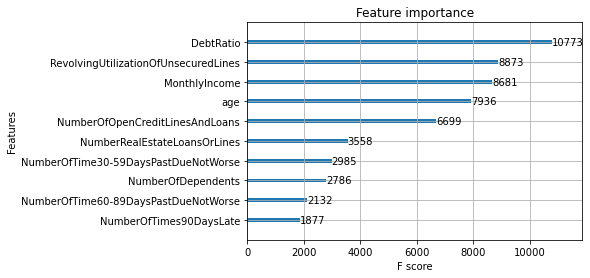

In [61]:
# Plot feature importance of the best estimator
plot_importance(model.best_estimator_)
pyplot.show()

In [62]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [46]:
print("Model's AUC on training dataset is " + str(roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])))

Model's score on training dataset is 0.8777615774073867


In [54]:
# Save Model
print("Saving model as model.pkl")
joblib.dump(model, open("model.pkl", "wb"))
print("Model has been successfully saved")

Saving model as model.pkl
Model has been successfully saved


### Generate Predictions

In [52]:
# Preprocess Test Data
test = pd.read_csv("cs-test.csv", index_col=0)

# Mean & Mode imputation
test["NumberOfDependents"] = test["NumberOfDependents"].fillna(dependents_mode)
test["MonthlyIncome"] = test["MonthlyIncome"].fillna(income_median)

# Generate Predictions
X_test = test.drop(["SeriousDlqin2yrs"],axis=1)
predict_prob = model.predict_proba(X_test)[:, -1]

# Save Predictions
result = pd.DataFrame({"Id": test.index, "Probability": predict_prob})
result["Id"] = result["Id"].astype(int)
result["Probability"] = result["Probability"].astype(float)
result.to_csv("submission.csv", index=False)